In [3]:
if __name__ == '__main__':
    import sys
    import os
    from pathlib import Path
    curr_file_path = Path(os.path.abspath(''))
    sys.path.append(str(curr_file_path.parent))

import numpy as np
import glob2 as glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import torch
from sklearn.decomposition import PCA
from agents.networks.gru_rnn import GRU_RNN

AVERAGING_SIZE = 20

color_set_1 = [
    '#E4F1F7',
    '#C5E1EF',
    '#9EC9E2',
    '#6CB0D6',
    '#3C93C2',
    '#226E9C',
    '#0D4A70',
    '#054166',
]

color_set_2 = [
    '#F9D8E6',
    '#F2ACCA',
    '#ED85B0',
    '#E95694',
    '#E32977',
    '#C40F5B',
    '#8F003B',
    '#69022c',
]

color_set_3 = [
    '#E6E6FA',
    '#D8BFD8',
    '#BA55D3',
    '#9370DB',
    '#8A2BE2',
    '#6A5ACD',
    '#4B0082',
    '#2E0854',
]

HIDDEN_SIZE = 32
INPUT_SIZE = 1

In [4]:
hypo_data = [
]

ctrl_data = [
    'glorot_init_int_test_2_2025-01-23_17_57_59_502722_var_noise_5e-05_activity_weight_1e-07',
]

In [5]:
def load_numpy(data_path, averaging_size=1, concat_ax=0):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        data_for_file = np.load(file_name)
        data.append(data_for_file)
    data = np.concatenate(data, axis=concat_ax)
    if averaging_size == 1:
        return data
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data

In [6]:
hidden_state_data = None
for i_d, d in enumerate(ctrl_data):
    print(d)
    hs_path = f'../../results/line_attr_supervised/{d}/hidden_states/*.npy'
    o_path = f'../../results/line_attr_supervised/{d}/outputs/*.npy'
    hidden_state_data = load_numpy(hs_path)
    output_data = load_numpy(o_path, concat_ax=1)
    break

print(hidden_state_data.shape)

glorot_init_int_test_2_2025-01-23_17_57_59_502722_var_noise_5e-05_activity_weight_1e-07
(2000, 32, 500)


(2, 2000)


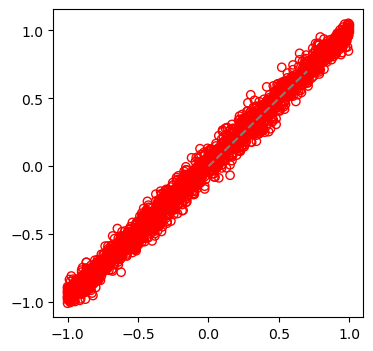

In [7]:
scale = 1
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

# output_data = output_data.reshape((2, 2000), order='F')
print(output_data.shape)

cbar = axs.scatter(output_data[1, :], output_data[0, :], edgecolor='red', facecolor='none')
axs.plot([0, 0.7], [0, 0.7], '--', c='gray')

[-1.0089025 -1.0030495 -0.9957768 ...  1.0452416  1.0466185  1.0530193]
0
200
400
600
800
1000
1200
1400
1600
1800


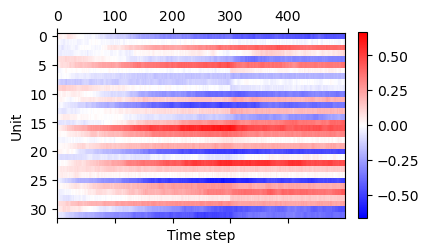

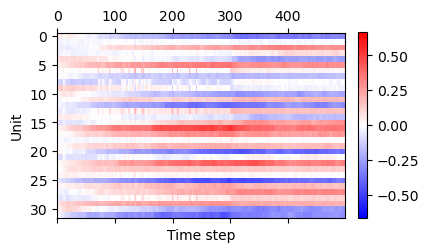

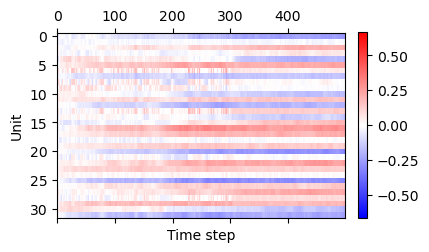

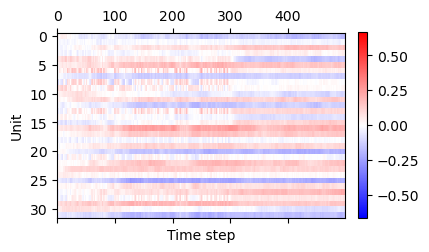

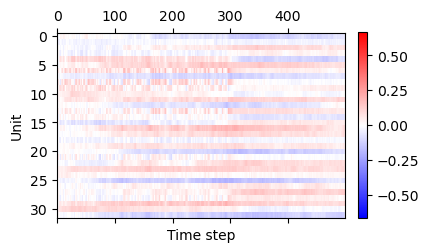

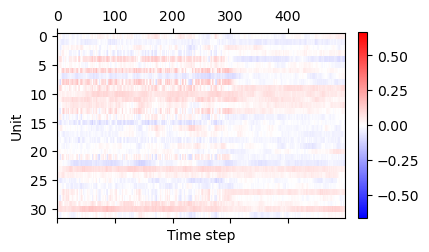

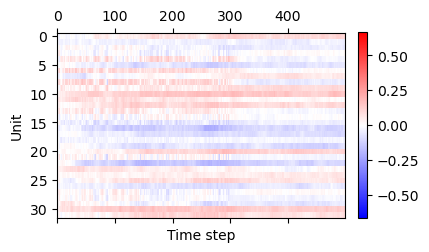

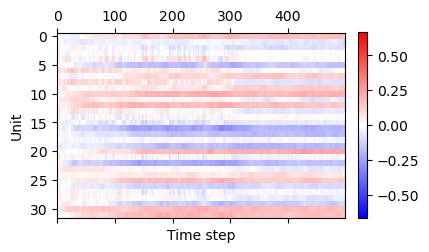

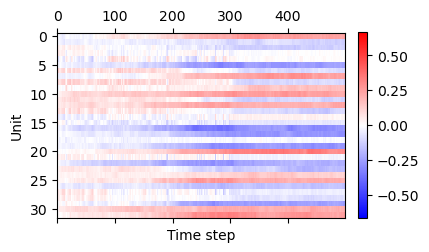

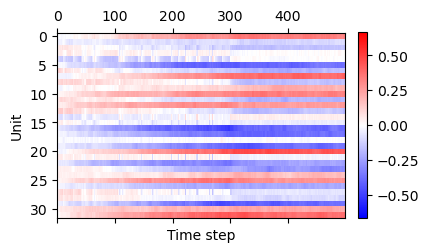

In [8]:
m = np.abs(hidden_state_data).max()

sorted_hidden_activity = hidden_state_data[output_data[0, :].argsort(), ...]

print(output_data[0, :][output_data[0, :].argsort()])

for k in range(0, 2000, 200):
    print(k)
    hidden_activity = sorted_hidden_activity[k, ...]
    
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))
    axs.set_ylabel('Unit')
    axs.set_xlabel('Time step')

    cbar = axs.matshow(hidden_activity, vmin=-m, vmax=m, cmap='bwr', aspect=10)
    plt.colorbar(cbar, fraction=0.03, pad=0.04)

# PC space representation

(32, 2000, 500)
(32, 1000000)
[[-0.22893332  0.03515732  0.14383025  0.00964709 -0.04612095  0.27060047
   0.05924619 -0.1912938   0.01511644 -0.06040448 -0.20225312  0.11012505
  -0.23279189  0.0900656  -0.04837805  0.09442312  0.32470345  0.24124184
   0.00405494  0.21643834 -0.29909703  0.00237246  0.25810328  0.14187466
  -0.04477736 -0.28662097  0.15727754  0.11090746  0.05867043  0.24090245
  -0.17737377 -0.28073782]
 [ 0.08670536  0.08165202 -0.18956812 -0.12486477  0.45108843  0.10724319
   0.25984225 -0.22056834  0.18922047 -0.00826553  0.12414466  0.08868419
   0.07719271  0.01055148  0.18189478 -0.3370061   0.02929832  0.08296257
  -0.06328765  0.16775699  0.01272585  0.0085498  -0.18475181  0.26649144
  -0.09274126  0.03436441 -0.00299348 -0.25581858 -0.05255114  0.26971385
   0.29772812 -0.08124774]
 [-0.16695772  0.02951883  0.15654747  0.089527   -0.24645056 -0.08122929
   0.25704646 -0.17939845  0.43568388 -0.2387011  -0.01908946  0.22133173
   0.18127273  0.31846005 -0

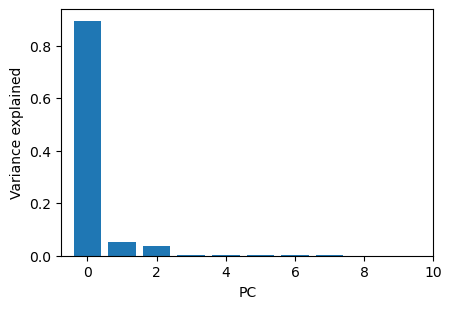

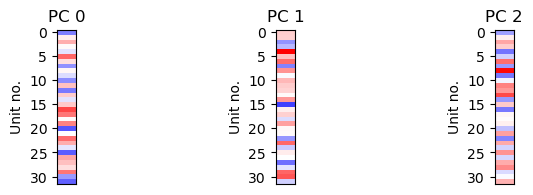

In [9]:
data_ = np.transpose(hidden_state_data, [1, 0, 2])
flattened_data = data_.reshape(data_.shape[0], data_.shape[1] * data_.shape[2])
print(data_.shape)
print(flattened_data.shape)
pca = PCA()
pc_activities = pca.fit_transform(flattened_data.T)
explained_variance_ratios = pca.explained_variance_ratio_

scale = 0.8
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.bar(np.arange(explained_variance_ratios.shape[0]), explained_variance_ratios)
axs.set_xlim(-0.75, 10)
axs.set_ylabel('Variance explained')
axs.set_xlabel('PC')

scale = 2

print(pca.components_[:3, :])
fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))
m = np.abs(pca.components_[:3, :]).max()
for i in range(3):
    axs[i].matshow(pca.components_[i, :].reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr', aspect=0.25)
    axs[i].set_xticks([])
    axs[i].set_ylabel('Unit no.')
    axs[i].set_title(f'PC {i}')

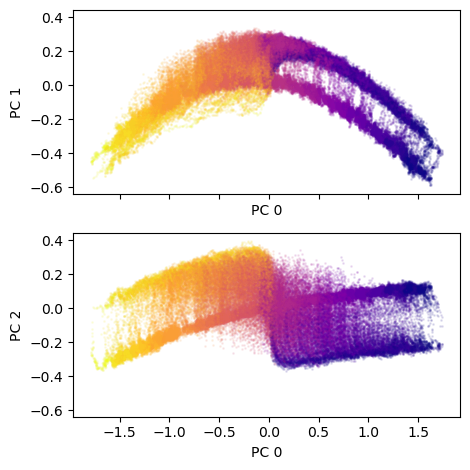

In [11]:
scale = 1.2
fig, axs = plt.subplots(2, 1, figsize=(4 * scale, 4 * scale), sharex=True, sharey=True)

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 41))

for run_idx in range(0, 200, 1):
    cbar = axs[0].scatter(
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 0],
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 1],
        s=1,
        color=colors[int(20 * (1 + output_data[0, run_idx]))],
        alpha=0.1,
        # vmax=2,
    )
    cbar = axs[1].scatter(
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 0],
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 2],
        s=1,
        color=colors[int(20 * (1 + output_data[0, run_idx]))],
        alpha=0.1,
        # vmax=2,
    )
axs[0].set_xlabel(f'PC 0')
axs[0].set_ylabel(f'PC 1')
axs[1].set_xlabel(f'PC 0')
axs[1].set_ylabel(f'PC 2')
# axs[0].set_xlim(-1.75, 1.75)
# axs[0].set_ylim(-1.75, 1.75)
    # fig.colorbar(cbar)
fig.tight_layout()

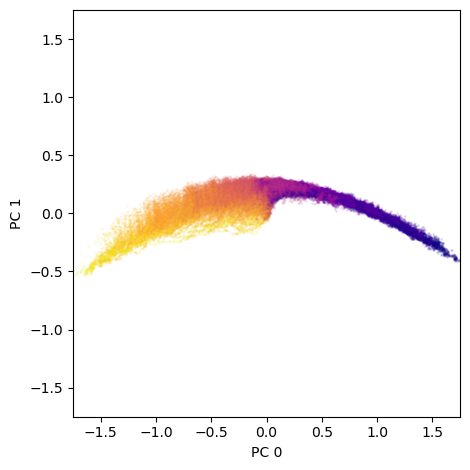

In [12]:
scale = 1.2
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 41))

for run_idx in range(0, 200, 1):
    for k in np.arange(0, 2, 2):
        cbar = axs.scatter(
            pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * run_idx + 300, k],
            pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * run_idx + 300, k + 1],
            s=1,
            color=colors[int(20 * (1 + output_data[0, run_idx]))],
            alpha=0.1,
            # vmax=2,
        )
axs.set_xlabel(f'PC 0')
axs.set_ylabel(f'PC 1')
axs.set_xlim(-1.75, 1.75)
axs.set_ylim(-1.75, 1.75)
    # fig.colorbar(cbar)
fig.tight_layout()

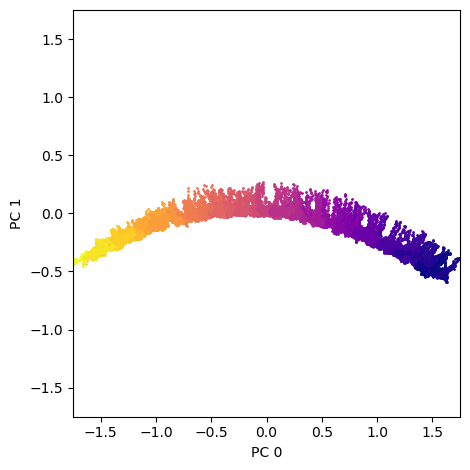

In [13]:
scale = 1.2
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 41))

for run_idx in range(0, 200, 1):
    for k in np.arange(0, 2, 2):
        cbar = axs.scatter(
            pc_activities[hidden_state_data.shape[2] * run_idx + 300:hidden_state_data.shape[2] * (run_idx + 1), k],
            pc_activities[hidden_state_data.shape[2] * run_idx + 300:hidden_state_data.shape[2] * (run_idx + 1), k + 1],
            s=1,
            color=colors[int(20 * (1 + output_data[0, run_idx]))],
            # vmax=2,
        )
axs.set_xlabel(f'PC 0')
axs.set_ylabel(f'PC 1')
axs.set_xlim(-1.75, 1.75)
axs.set_ylim(-1.75, 1.75)
    # fig.colorbar(cbar)
fig.tight_layout()

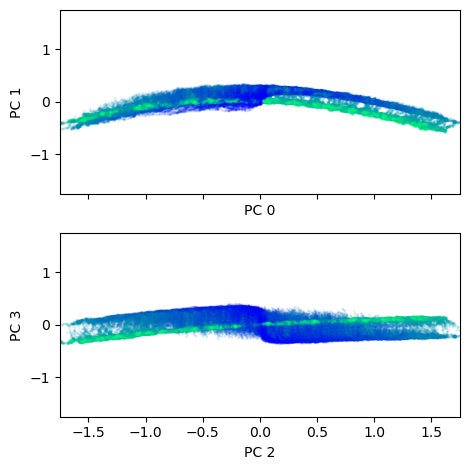

In [14]:
scale = 1.2
fig, axs = plt.subplots(2, 1, figsize=(4 * scale, 4 * scale), sharex=True, sharey=True)

cmap = mpl.colormaps['winter']
colors = cmap(np.linspace(0, 1, 500))

for run_idx in range(0, 200, 1):
    alpha = 0.1
    cbar = axs[0].scatter(
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 0],
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 1],
        s=1,
        color=colors[np.arange(500)],
        alpha=alpha,
    )
    cbar = axs[1].scatter(
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 0],
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 2],
        s=1,
        color=colors[np.arange(500)],
        alpha=alpha,
    )
axs[0].set_xlabel(f'PC 0')
axs[0].set_ylabel(f'PC 1')
axs[1].set_xlabel(f'PC 2')
axs[1].set_ylabel(f'PC 3')
axs[0].set_xlim(-1.75, 1.75)
axs[0].set_ylim(-1.75, 1.75)
    # fig.colorbar(cbar)
fig.tight_layout()

In [86]:
all_w_hh_trained = []
all_w_ih_trained = []
all_b_hh_trained = []
all_w_out = []
all_b_out = []

for i_d, d in enumerate(ctrl_data):

    network_trained = GRU_RNN(
        input_size=INPUT_SIZE,
        hidden_size=HIDDEN_SIZE,
        device='cpu',
        var_noise=1e-7,
    )
    
    load_path = f'../../results/line_attr_supervised/{d}/rnn_weights/weights.h5'
    network_trained.load_state_dict(torch.load(load_path, weights_only=True))
    
    w_hh_trained = network_trained.rnn.weight_hh.detach().numpy()
    all_w_hh_trained.append(w_hh_trained)

    b_hh_trained = network_trained.rnn.bias_hh.detach().numpy()
    all_b_hh_trained.append(b_hh_trained)

    w_ih_trained = network_trained.rnn.weight_ih.detach().numpy()
    all_w_ih_trained.append(w_ih_trained)

    all_w_out.append(network_trained.output_arm.weight.detach().numpy())
    all_b_out.append(network_trained.output_arm.bias.detach().numpy())



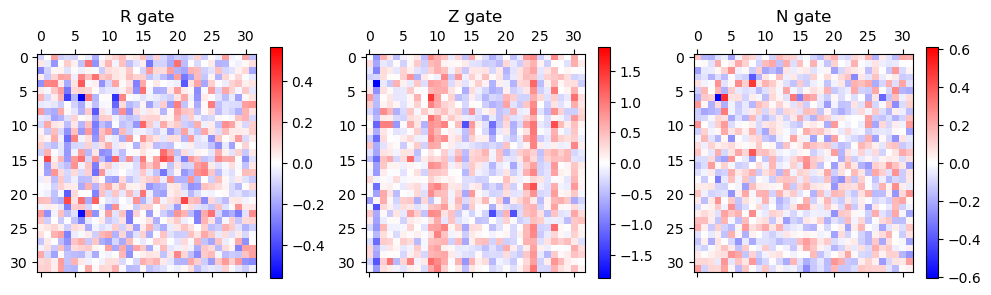

In [87]:
scale = 3

for w_hh_trained in all_w_hh_trained:
    fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))
    
    for k in range(3):
        m = np.abs(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE]).max()
        cbar = axs[k].matshow(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], vmin=-m, vmax=m, cmap='bwr')
        plt.colorbar(cbar)
    axs[0].set_title(f'R gate')
    axs[1].set_title(f'Z gate')
    axs[2].set_title(f'N gate')

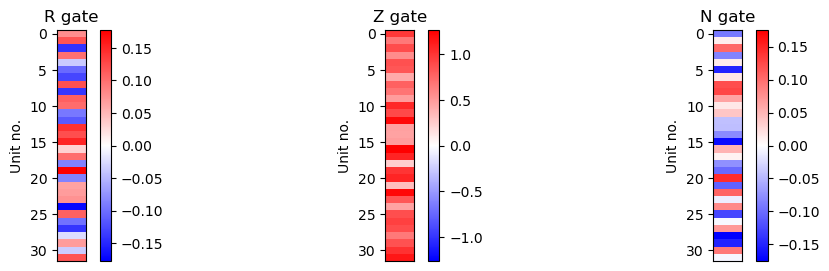

In [17]:
scale = 3

for b_hh_trained in all_b_hh_trained:
    fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))
    
    for k in range(3):
        m = np.abs(b_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE]).max()
        cbar = axs[k].matshow(b_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE, np.newaxis], vmin=-m, vmax=m, cmap='bwr', aspect=0.25)
        plt.colorbar(cbar)
        axs[k].set_xticks([])
        axs[k].set_ylabel('Unit no.')
    axs[0].set_title(f'R gate')
    axs[1].set_title(f'Z gate')
    axs[2].set_title(f'N gate')

## Input weights

PC 0 aligment 0.20256227
PC 1 aligment -0.0627426
PC 2 aligment 0.0832327

PC 0 aligment 0.07331893
PC 1 aligment 0.054471977
PC 2 aligment -0.2733469

PC 0 aligment -0.17190093
PC 1 aligment -0.35763016
PC 2 aligment 0.88543177



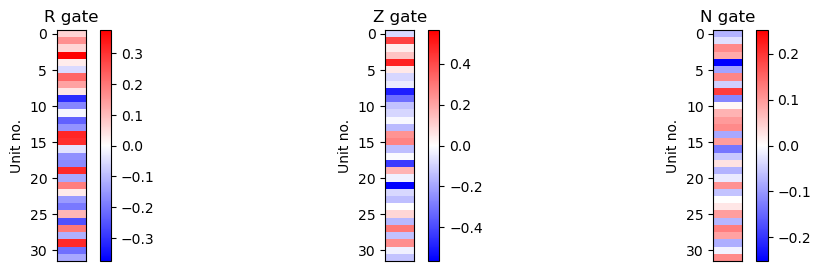

In [18]:
scale = 3

for w_ih_trained in all_w_ih_trained:
    fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))
    
    for k in range(3):
        m = np.abs(w_ih_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE]).max()
        cbar = axs[k].matshow(w_ih_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE][:, np.newaxis], vmin=-m, vmax=m, cmap='bwr', aspect=0.25)
        normed_weight_vec = w_ih_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE].reshape(HIDDEN_SIZE)
        print('PC 0 aligment', np.dot(normed_weight_vec / np.linalg.norm(normed_weight_vec), pca.components_[0, :]))
        print('PC 1 aligment', np.dot(normed_weight_vec / np.linalg.norm(normed_weight_vec), pca.components_[1, :]))
        print('PC 2 aligment', np.dot(normed_weight_vec / np.linalg.norm(normed_weight_vec), pca.components_[2, :]))
        print('')
        plt.colorbar(cbar)
        axs[k].set_xticks([])
        axs[k].set_ylabel('Unit no.')
    axs[0].set_title(f'R gate')
    axs[1].set_title(f'Z gate')
    axs[2].set_title(f'N gate')

## Alignment of recurrent weights with PCs

(2000, 32, 500)

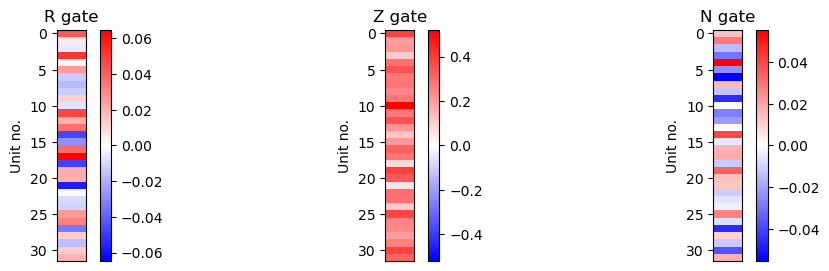

In [19]:
scale = 3

for w_hh_trained in all_w_hh_trained:
    fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))

    h_mean = hidden_state_data.mean(axis=2).mean(axis=0)
    
    for k in range(3):
        m = np.abs(np.dot(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], h_mean)).max()
        cbar = axs[k].matshow(np.dot(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE, :], h_mean)[:, np.newaxis], vmin=-m, vmax=m, cmap='bwr', aspect=0.25)
        plt.colorbar(cbar)
        axs[k].set_xticks([])
        axs[k].set_ylabel('Unit no.')
    axs[0].set_title(f'R gate')
    axs[1].set_title(f'Z gate')
    axs[2].set_title(f'N gate')

hidden_state_data.shape

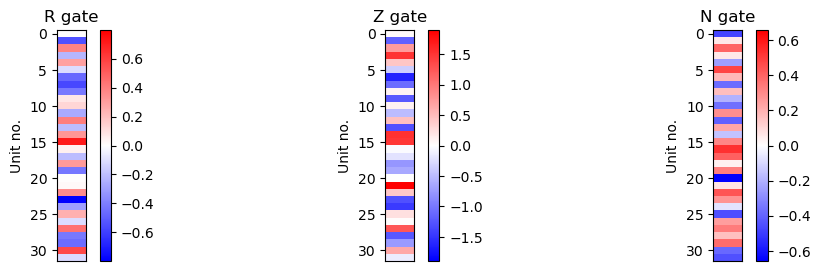

In [20]:
scale = 3

for w_hh_trained in all_w_hh_trained:
    fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))
    
    for k in range(3):
        m = np.abs(np.dot(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], pca.components_[0, :])).max()
        cbar = axs[k].matshow(np.dot(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE, :], pca.components_[0, :])[:, np.newaxis], vmin=-m, vmax=m, cmap='bwr', aspect=0.25)
        plt.colorbar(cbar)
        axs[k].set_xticks([])
        axs[k].set_ylabel('Unit no.')
    axs[0].set_title(f'R gate')
    axs[1].set_title(f'Z gate')
    axs[2].set_title(f'N gate')

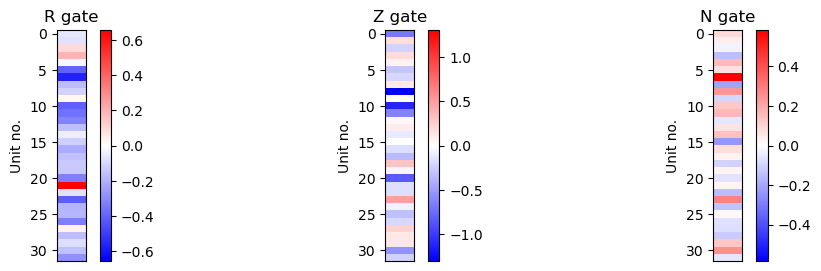

In [21]:
scale = 3

for w_hh_trained in all_w_hh_trained:
    fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))
    
    for k in range(3):
        m = np.abs(np.dot(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], pca.components_[1, :])).max()
        cbar = axs[k].matshow(np.dot(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE, :], pca.components_[1, :])[:, np.newaxis], vmin=-m, vmax=m, cmap='bwr', aspect=0.25)
        plt.colorbar(cbar)
        axs[k].set_xticks([])
        axs[k].set_ylabel('Unit no.')
    axs[0].set_title(f'R gate')
    axs[1].set_title(f'Z gate')
    axs[2].set_title(f'N gate')

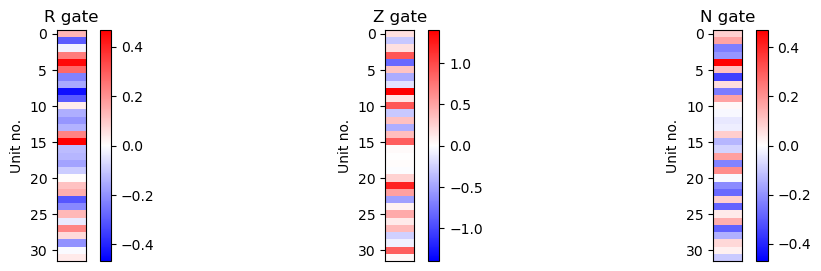

In [22]:
scale = 3

for w_hh_trained in all_w_hh_trained:
    fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))
    
    for k in range(3):
        m = np.abs(np.dot(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE, :], pca.components_[2, :])).max()
        cbar = axs[k].matshow(np.dot(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE, :], pca.components_[2, :])[:, np.newaxis], vmin=-m, vmax=m, cmap='bwr', aspect=0.25)
        plt.colorbar(cbar)
        axs[k].set_xticks([])
        axs[k].set_ylabel('Unit no.')
    axs[0].set_title(f'R gate')
    axs[1].set_title(f'Z gate')
    axs[2].set_title(f'N gate')

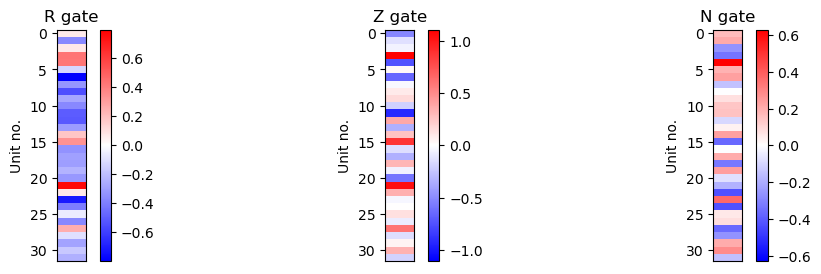

In [23]:
scale = 3

for w_hh_trained in all_w_hh_trained:
    fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))

    v = (pca.components_[1, :] + pca.components_[2, :])
    
    for k in range(3):
        m = np.abs(np.dot(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE, :], v)).max()
        cbar = axs[k].matshow(np.dot(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE, :], v)[:, np.newaxis], vmin=-m, vmax=m, cmap='bwr', aspect=0.25)
        plt.colorbar(cbar)
        axs[k].set_xticks([])
        axs[k].set_ylabel('Unit no.')
    axs[0].set_title(f'R gate')
    axs[1].set_title(f'Z gate')
    axs[2].set_title(f'N gate')

In [123]:
np.linalg.eig(w_hh_trained[:HIDDEN_SIZE]).eigenvalues

array([-0.5308925 +0.69489574j, -0.5308925 -0.69489574j,
       -0.14961766+0.7056012j , -0.14961766-0.7056012j ,
        0.75285316+0.j        ,  0.65928   +0.18895972j,
        0.65928   -0.18895972j, -0.6577114 +0.j        ,
       -0.53583795+0.22026129j, -0.53583795-0.22026129j,
        0.38208696+0.46708378j,  0.38208696-0.46708378j,
       -0.4335398 +0.j        , -0.34044608+0.31019893j,
       -0.34044608-0.31019893j, -0.22484808+0.34971777j,
       -0.22484808-0.34971777j,  0.06650985+0.4687518j ,
        0.06650985-0.4687518j , -0.00686275+0.4412511j ,
       -0.00686275-0.4412511j ,  0.47375157+0.j        ,
        0.3882705 +0.24444398j,  0.3882705 -0.24444398j,
        0.35035223+0.1265503j ,  0.35035223-0.1265503j ,
        0.03917289+0.2553593j ,  0.03917289-0.2553593j ,
       -0.11070792+0.14613335j, -0.11070792-0.14613335j,
        0.2011715 +0.j        ,  0.03909173+0.j        ], dtype=complex64)

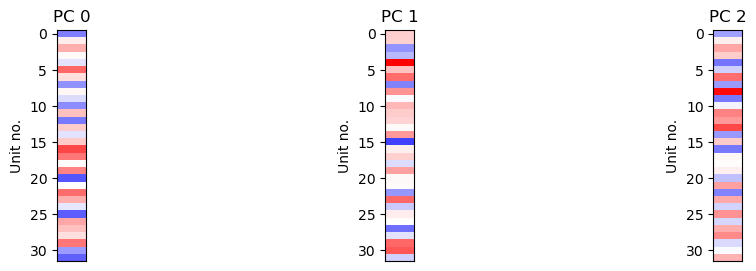

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))
m = np.abs(pca.components_[:3, :]).max()
for i in range(3):
    axs[i].matshow(pca.components_[i, :].reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr', aspect=0.25)
    axs[i].set_xticks([])
    axs[i].set_ylabel('Unit no.')
    axs[i].set_title(f'PC {i}')

[-1.0089025 -1.0030495 -0.9957768 ...  1.0452416  1.0466185  1.0530193]
0
200
400
600
800
1000
1200
1400
1600
1800


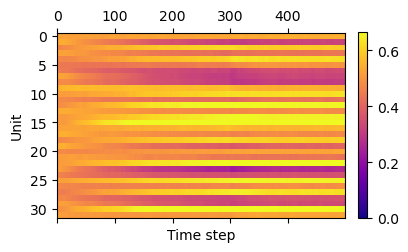

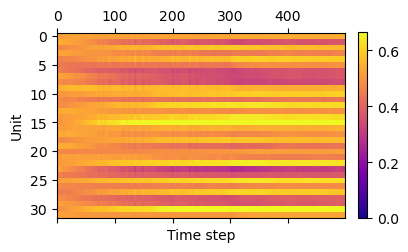

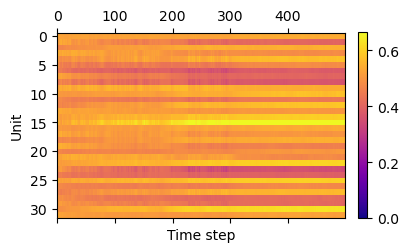

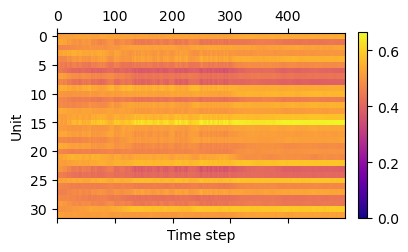

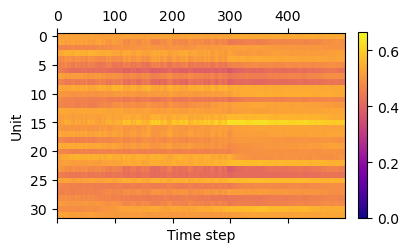

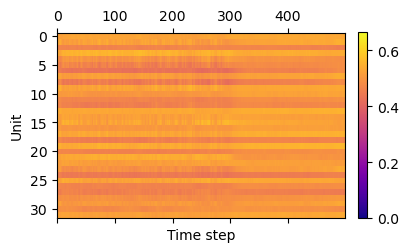

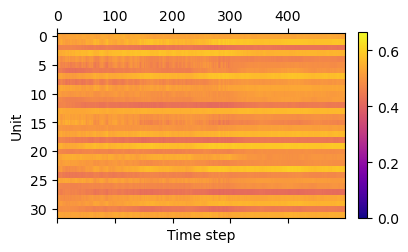

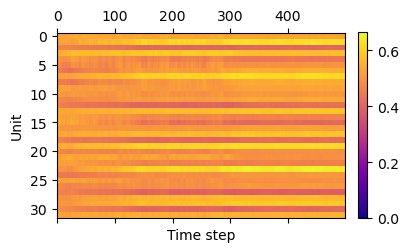

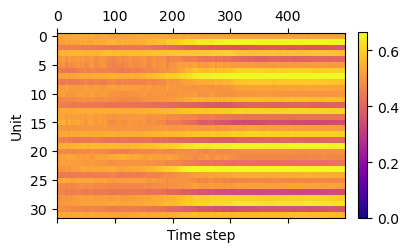

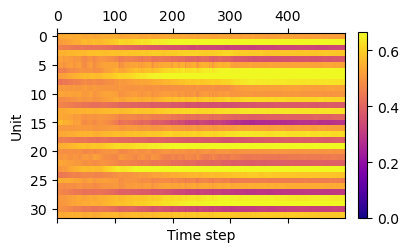

In [40]:
m = np.abs(hidden_state_data).max()

sorted_hidden_activity = hidden_state_data[output_data[0, :].argsort(), ...]

print(output_data[0, :][output_data[0, :].argsort()])

for k in range(0, 2000, 200):
    print(k)
    hidden_activity = sorted_hidden_activity[k, ...]
    
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))
    axs.set_ylabel('Unit')
    axs.set_xlabel('Time step')

    cbar = axs.matshow(
        1.0 / (1.0 + np.exp(-(np.dot(w_hh_trained, hidden_activity)[:HIDDEN_SIZE, :] + b_hh_trained[:HIDDEN_SIZE, np.newaxis]))),
        vmin=0,
        vmax=m,
        cmap='plasma',
        aspect=10,
    )
    plt.colorbar(cbar, fraction=0.03, pad=0.04)

In [83]:
w_r_fake_data = [
    'glorot_init_int_test_2_fake_w_reset_2025-01-23_22_05_57_902678_var_noise_5e-05_activity_weight_1e-07',
]

In [79]:
hidden_state_data = None
for i_d, d in enumerate(w_r_fake_data):
    print(d)
    hs_path = f'../../results/line_attr_supervised/{d}/hidden_states/*.npy'
    o_path = f'../../results/line_attr_supervised/{d}/outputs/*.npy'
    hidden_state_data = load_numpy(hs_path)
    output_data = load_numpy(o_path, concat_ax=1)
    break

print(hidden_state_data.shape)

glorot_init_int_test_2_fake_w_reset_2025-01-23_22_39_02_538506_var_noise_5e-05_activity_weight_1e-07
(2000, 32, 500)


(2, 2000)


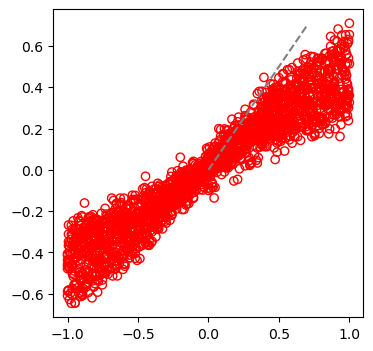

In [80]:
scale = 1
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

# output_data = output_data.reshape((2, 2000), order='F')
print(output_data.shape)

cbar = axs.scatter(output_data[1, :], output_data[0, :], edgecolor='red', facecolor='none')
axs.plot([0, 0.7], [0, 0.7], '--', c='gray')

In [84]:
all_w_hh_trained = []
all_w_ih_trained = []
all_b_hh_trained = []
all_w_out = []
all_b_out = []

for i_d, d in enumerate(w_r_fake_data):

    network_trained = GRU_RNN(
        input_size=INPUT_SIZE,
        hidden_size=HIDDEN_SIZE,
        device='cpu',
        var_noise=1e-7,
    )
    
    load_path = f'../../results/line_attr_supervised/{d}/rnn_weights/weights.h5'
    network_trained.load_state_dict(torch.load(load_path, weights_only=True))
    
    w_hh_trained = network_trained.rnn.weight_hh.detach().numpy()
    all_w_hh_trained.append(w_hh_trained)

    b_hh_trained = network_trained.rnn.bias_hh.detach().numpy()
    all_b_hh_trained.append(b_hh_trained)

    w_ih_trained = network_trained.rnn.weight_ih.detach().numpy()
    all_w_ih_trained.append(w_ih_trained)

    all_w_out.append(network_trained.output_arm.weight.detach().numpy())
    all_b_out.append(network_trained.output_arm.bias.detach().numpy())

[-0.646628   -0.6459026  -0.643721   ...  0.65498614  0.681893
  0.7099204 ]
0
200
400
600
800
1000
1200
1400
1600
1800


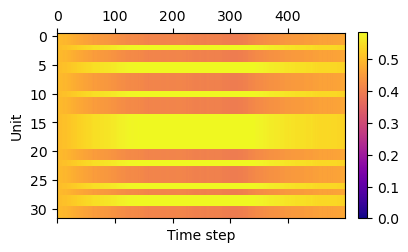

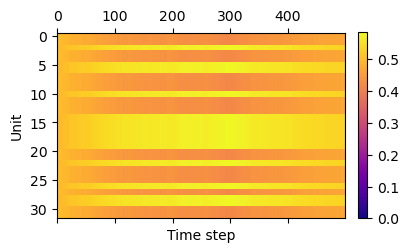

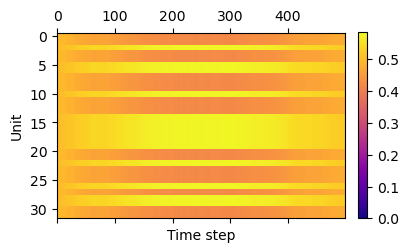

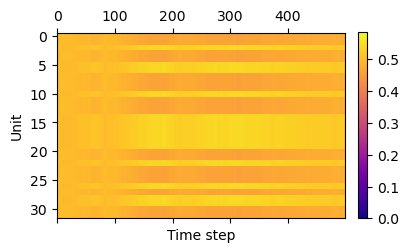

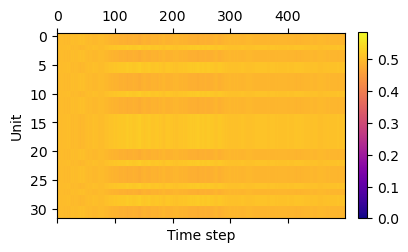

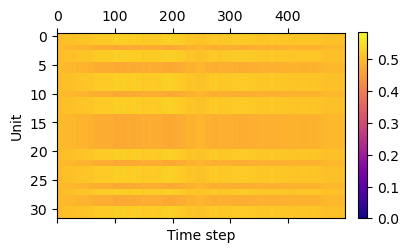

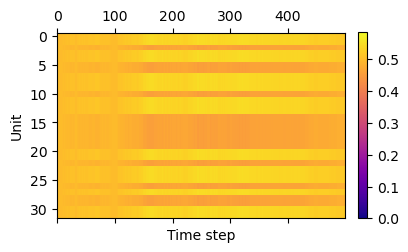

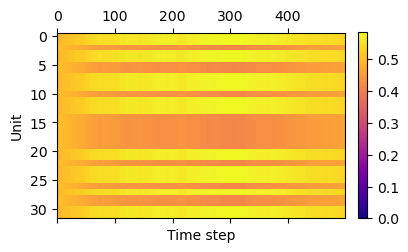

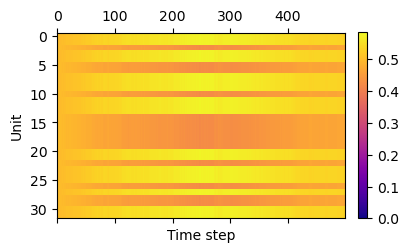

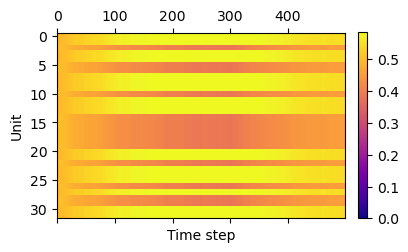

In [82]:
m = np.abs(hidden_state_data).max()

sorted_hidden_activity = hidden_state_data[output_data[0, :].argsort(), ...]

print(output_data[0, :][output_data[0, :].argsort()])

for k in range(0, 2000, 200):
    print(k)
    hidden_activity = sorted_hidden_activity[k, ...]
    
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))
    axs.set_ylabel('Unit')
    axs.set_xlabel('Time step')

    cbar = axs.matshow(
        1.0 / (1.0 + np.exp(-(np.dot(w_hh_trained, hidden_activity)[:HIDDEN_SIZE, :] + b_hh_trained[:HIDDEN_SIZE, np.newaxis]))),
        vmin=0,
        vmax=m,
        cmap='plasma',
        aspect=10,
    )
    plt.colorbar(cbar, fraction=0.03, pad=0.04)